In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sci
import matplotlib
import scikit_posthocs as sci_posthocs

import analysis as ana

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [12]:
import matplotlib as mpl
from matplotlib import rc

rc('text', usetex=False)
font = {#'family':'CMU Serif', 
               #'sans-serif':['Helvetica'],
               'size': 11}
mpl.rc('font', **font)

# Lodaing Data

In [13]:
cog_data, subj_data = ana.load_data('../data')

In [14]:
cog_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 1093 to 1047
Columns: 37 entries, sex to acpt01_RT
dtypes: float64(36), int64(1)
memory usage: 67.1 KB


'In good health': 0, 

'Affective psychosis': 1, 

'Non-affective psychosis': 2

# Correlations

### Features 

In [7]:
cog_f0 = ana.get_group_data(cog_data, group=0, corr=True)
print('control - cognitive feature corr (mean, var)', np.mean(np.array(cog_f0)), np.var(np.array(cog_f0)))
cog_f1 = ana.get_group_data(cog_data, group=1, corr=True)
print('affecti - cognitive feature corr (mean, var)',np.mean(np.array(cog_f1)), np.var(np.array(cog_f1)))
cog_f2 = ana.get_group_data(cog_data, group=2, corr=True)
print('non-aff - cognitive feature corr (mean, var)',np.mean(np.array(cog_f2)), np.var(np.array(cog_f2)))

control - cognitive feature corr (mean, var) 0.10693863812891764 0.08167266307901015
affecti - cognitive feature corr (mean, var) 0.06624515708331101 0.09218759000127467
non-aff - cognitive feature corr (mean, var) 0.1053018860411355 0.08077272987516623


In [11]:
sci_posthocs.posthoc_ttest([np.array(cog_f0).flatten(), np.array(cog_f1).flatten(), np.array(cog_f2).flatten()])

,1,2,3
1,1.000000,0.001305,0.893454
2,0.001305,1.000000,0.001975
3,0.893454,0.001975,1.000000


In [12]:
n=3
stat, p = sci.stats.levene(np.array(cog_f0).flatten(), np.array(cog_f1).flatten(), center='median')
print('control - affecti:', stat, p*3)
stat, p = sci.stats.levene(np.array(cog_f0).flatten(), np.array(cog_f2).flatten(), center='median')
print('control - non-aff:', stat, p*3)
stat, p = sci.stats.levene(np.array(cog_f1).flatten(), np.array(cog_f2).flatten(), center='median')
print('affecti - non-aff:', stat, p*3)

control - affecti: 3.1201611453741864 0.2324079597017018
control - non-aff: 1.142657072380487 0.8556304160968189
affecti - non-aff: 7.560501917426209 0.018046392654981844


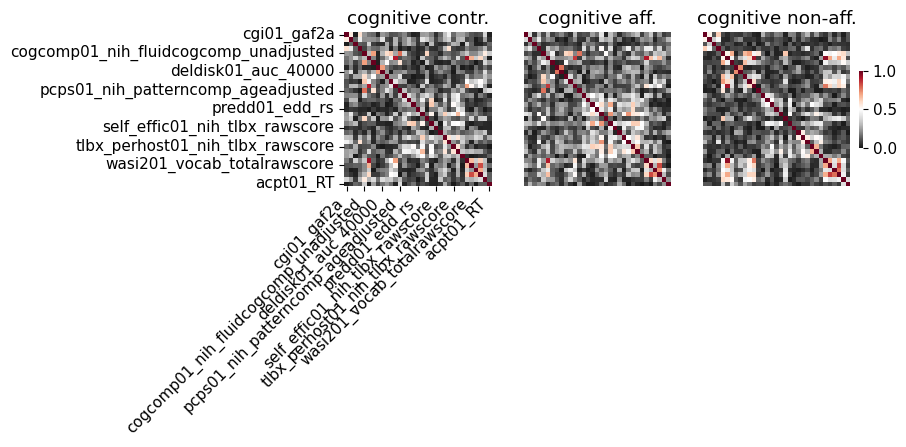

In [13]:
fig, ax = plt.subplots(1,3,figsize=(7,2), gridspec_kw={'width_ratios':[1,1,1.25]})

ax0 = sns.heatmap(abs(cog_f0), ax=ax[0], cbar=False,
                vmin=0, vmax=1, cmap = 'RdGy_r')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right')
ax0.set_title('cognitive contr.')

ax1 = sns.heatmap(abs(cog_f1), ax=ax[1], cbar=False, yticklabels=False, xticklabels=False,
                vmin=0, vmax=1, cmap = 'RdGy_r')
ax1.set_title('cognitive aff.')

ax2 = sns.heatmap(abs(cog_f2), ax=ax[2], yticklabels=False, xticklabels=False,
                cbar_kws={"shrink": 0.5}, vmin=0, vmax=1, cmap = 'RdGy_r')
ax2.set_title('cognitive non-aff.')
cbar = ax2.collections[0].colorbar
plt.savefig('fig/feat_cor_cog.svg', dpi=500, bbox_inches='tight')

### brain

In [22]:
brain_f0 = ana.get_group_data(brain_data, 0, brain=True, corr=True)
print('control - brain feature corr (mean, var)', np.mean(np.array(brain_f0)), np.var(np.array(brain_f0)))
brain_f1 = ana.get_group_data(brain_data, 1, brain=True, corr=True)
print('affecti - brain feature corr (mean, var)', np.mean(np.array(brain_f1)), np.var(np.array(brain_f1)))
brain_f2 = ana.get_group_data(brain_data, 2, brain=True, corr=True)
print('non-aff - brain feature corr (mean, var)', np.mean(np.array(brain_f2)), np.var(np.array(brain_f2)))

control - brain feature corr (mean, var) 0.0021944754717790065 0.12385229291332583
affecti - brain feature corr (mean, var) 0.010187273297840756 0.14170002493760636
non-aff - brain feature corr (mean, var) 0.0034893318209966257 0.11375914768691958


In [23]:
sci_posthocs.posthoc_ttest([np.array(brain_f0).flatten(), np.array(brain_f1).flatten(), np.array(brain_f2).flatten()])

,1,2,3
1,1.000000,0.641949,0.936527
2,0.641949,1.000000,0.691165
3,0.936527,0.691165,1.000000


In [24]:
n=3
stat, p = sci.stats.levene(np.array(brain_f0).flatten(), np.array(brain_f1).flatten(), center='median')
print('control - affecti:', stat, p*3)
stat, p = sci.stats.levene(np.array(brain_f0).flatten(), np.array(brain_f2).flatten(), center='median')
print('control - non-aff:', stat, p*3)
stat, p = sci.stats.levene(np.array(brain_f1).flatten(), np.array(brain_f2).flatten(), center='median')
print('affecti - non-aff:', stat, p*3)

control - affecti: 6.426641963864475 0.03397868927986518
control - non-aff: 3.230643478077721 0.21732007737010275
affecti - non-aff: 18.73803098164117 4.7464273067168546e-05


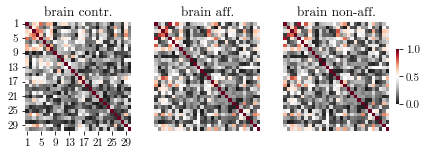

In [25]:
fig, ax = plt.subplots(1,3,figsize=(7,2), gridspec_kw={'width_ratios':[1,1,1.25]})

ax0 = sns.heatmap(abs(brain_f0), ax=ax[0], cbar=False,
                vmin=0, vmax=1, cmap = 'RdGy_r')
ax0.set_yticklabels(ax0.get_yticklabels(), rotation=0, ha='right')
ax0.set_title('brain contr.')

ax1 = sns.heatmap(abs(brain_f1), ax=ax[1], cbar=False, yticklabels=False, xticklabels=False,
                vmin=0, vmax=1, cmap = 'RdGy_r')
ax1.set_title('brain aff.')

ax2 = sns.heatmap(abs(brain_f1), ax=ax[2], yticklabels=False, xticklabels=False,
                cbar_kws={"shrink": 0.5}, vmin=0, vmax=1, cmap = 'RdGy_r')
ax2.set_title('brain non-aff.')
cbar = ax2.collections[0].colorbar
plt.savefig('fig/feat_cor_brain.svg', dpi=500, bbox_inches='tight')

### Subjects

In [7]:
cog_s0 = ana.get_group_data(cog_data, group=0, corr=True, subj=True)
print('control - cognitive subject corr (mean, var)', np.mean(np.array(cog_s0)), np.var(np.array(cog_s0)))
cog_s1 = ana.get_group_data(cog_data, group=1, corr=True, subj=True)
print('affecti - cognitive subject corr (mean, var)', np.mean(np.array(cog_s1)), np.var(np.array(cog_s1)))
cog_s2 = ana.get_group_data(cog_data, group=2, corr=True, subj=True)
print('non-aff - cognitive subject corr (mean, var)', np.mean(np.array(cog_s2)), np.var(np.array(cog_s2)))

control - cognitive subject corr (mean, var) 0.9904553323986226 3.630022272129493e-05
affecti - cognitive subject corr (mean, var) 0.987734619213551 4.4768953809429336e-05
non-aff - cognitive subject corr (mean, var) 0.9862603435958877 7.32510026340691e-05


In [15]:
print(sci.stats.ttest_ind(np.array(cog_s0).flatten(), np.array(cog_s1).flatten()))
print(sci.stats.ttest_ind(np.array(cog_s0).flatten(), np.array(cog_s2).flatten()))
print(sci.stats.ttest_ind(np.array(cog_s1).flatten(), np.array(cog_s2).flatten()))

TtestResult(statistic=16.3442481674126, pvalue=9.487653449732082e-59, df=5838.0)
TtestResult(statistic=26.032155630641718, pvalue=1.5391005293144346e-146, df=17058.0)
TtestResult(statistic=8.468269502414174, pvalue=2.6960548785445106e-17, df=16626.0)


In [16]:
sci_posthocs.posthoc_ttest([np.array(cog_s0).flatten(), np.array(cog_s1).flatten(), np.array(cog_s2).flatten()])

,1,2,3
1,1.000000e+00,9.487653e-59,1.539101e-146
2,9.487653e-59,1.000000e+00,2.696055e-17
3,1.539101e-146,2.696055e-17,1.000000e+00


In [17]:
n=3
stat, p = sci.stats.levene(np.array(cog_s0).flatten(), np.array(cog_s1).flatten(), center='median')
print('control - affecti:', stat, p*3)
stat, p = sci.stats.levene(np.array(cog_s0).flatten(), np.array(cog_s2).flatten(), center='median')
print('control - non-aff:', stat, p*3)
stat, p = sci.stats.levene(np.array(cog_s1).flatten(), np.array(cog_s2).flatten(), center='median')
print('affecti - non-aff:', stat, p*3)

control - affecti: 22.340409997635728 7.011281658017426e-06
control - non-aff: 187.2982586464943 6.212079021497826e-42
affecti - non-aff: 70.39308630910696 1.5734286609609776e-16


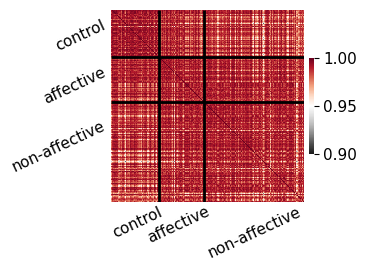

In [32]:
plt.figure(figsize=(3,2.5)) #
c = cog_data.drop(columns=['sex', 'interview_age', 'sestot', 'mot_edscale']).transpose()
c = c.corr()

ax = sns.heatmap(c, yticklabels=False, xticklabels=False,
                #cbar=False,
                cbar_kws={"shrink": .5, "pad":0.02}
                ,vmin=0.9, vmax=1,
                cmap = 'RdGy_r')
ax.set(xlabel=None, ylabel=None)
cbar = ax.collections[0].colorbar

ax.hlines([56, 108], *ax.get_xlim(), lw=2, color='black')
ax.vlines([56, 108], *ax.get_xlim(), lw=2, color='black')

ax.text(-4, 48, 'control', rotation=25, ha='right')
ax.text(-4, 110, 'affective', rotation=25, ha='right')
ax.text(-4, 190, 'non-affective', rotation=25, ha='right')

ax.text(-1, 228, 'control', rotation=25, va='top')
ax.text(40, 228,  'affective', rotation=25, va='top')
ax.text(110, 228, 'non-affective', rotation=25, va='top')
ax.axis('equal')
#ax.set_title('cognitive')

plt.savefig('fig/subj_cor_cog.svg', dpi=500, bbox_inches='tight')

In [27]:
np.where(subj_data.index==1036)

(array([108]),)

## brain

In [56]:
brain_s0 = ana.get_group_data(brain_data, group=0, brain=True, corr=True, subj=True)
print('control - brain subject corr (mean, var)', np.mean(np.array(brain_s0)), np.var(np.array(brain_s0)))
brain_s1 = ana.get_group_data(brain_data, group=1, brain=True,corr=True, subj=True)
print('affecti - brain subject corr (mean, var)', np.mean(np.array(brain_s1)), np.var(np.array(brain_s1)))
brain_s2 = ana.get_group_data(brain_data, group=2, brain=True,corr=True, subj=True)
print('non-aff - brain subject corr (mean, var)', np.mean(np.array(brain_s2)), np.var(np.array(brain_s2)))

control - brain subject corr (mean, var) 0.01876297749859604 0.11771668723607644
affecti - brain subject corr (mean, var) 0.04086990600115189 0.12311082200666543
non-aff - brain subject corr (mean, var) 0.015314213349716499 0.10198826683953433


In [57]:
print(sci.stats.ttest_ind(np.array(brain_s0).flatten(), np.array(brain_s1).flatten()))
print(sci.stats.ttest_ind(np.array(brain_s0).flatten(), np.array(brain_s2).flatten()))
print(sci.stats.ttest_ind(np.array(brain_s1).flatten(), np.array(brain_s2).flatten()))

Ttest_indResult(statistic=-1.4074634183858306, pvalue=0.15940348811344204)
Ttest_indResult(statistic=0.42810927361837864, pvalue=0.6685816196017065)
Ttest_indResult(statistic=1.9012423608908193, pvalue=0.05730767272574404)


In [58]:
sci_posthocs.posthoc_ttest([np.array(brain_s0).flatten(), np.array(brain_s1).flatten(), np.array(brain_s2).flatten()])

,1,2,3
1,1.000000,0.159403,0.668582
2,0.159403,1.000000,0.057308
3,0.668582,0.057308,1.000000


In [59]:
n=3
stat, p = sci.stats.levene(np.array(brain_s0).flatten(), np.array(brain_s1).flatten(), center='median')
print('control - affecti:', stat, p*3)
stat, p = sci.stats.levene(np.array(brain_s0).flatten(), np.array(brain_s2).flatten(), center='median')
print('control - non-aff:', stat, p*3)
stat, p = sci.stats.levene(np.array(brain_s1).flatten(), np.array(brain_s2).flatten(), center='median')
print('affecti - non-aff:', stat, p*3)

control - affecti: 1.2371628585735808 0.7983484656472286
control - non-aff: 21.062054659236797 1.3516687898096301e-05
affecti - non-aff: 2.0075841605470837 0.46966484124152486


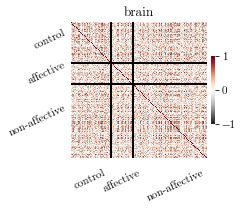

In [60]:
plt.figure(figsize=(3,2.5)) #
c = brain_data.transpose()
c = c.corr()

ax = sns.heatmap(c, yticklabels=False, xticklabels=False,
                #cbar=False,
                cbar_kws={"shrink": .5, "pad":0.02}
                ,vmin=-1, vmax=1,
                cmap = 'RdGy_r')
ax.set(xlabel=None, ylabel=None)
cbar = ax.collections[0].colorbar

ax.hlines([46, 71], *ax.get_xlim(), lw=2, color='black')
ax.vlines([46, 71], *ax.get_xlim(), lw=2, color='black')

ax.text(-4, 30, 'control', rotation=25, ha='right')
ax.text(-4, 70, 'affective', rotation=25, ha='right')
ax.text(-4, 130, 'non-affective', rotation=25, ha='right')

ax.text(2, 166, 'control', rotation=25, va='top')
ax.text(35, 166,  'affective', rotation=25, va='top')
ax.text(85, 166, 'non-affective', rotation=25, va='top')
ax.axis('equal')
ax.set_title('brain')

plt.savefig('fig/subj_cor_brain.svg', dpi=500, bbox_inches='tight')

## Medication

In [15]:
med_data = pd.read_csv('../data/med.txt', index_col=0)
med_data_patients = med_data[med_data.phenotype_description != 0]
cog_data_patients = cog_data[subj_data.phenotype_description != 0]
cog_data_patients = cog_data_patients.drop(columns=['sex', 'interview_age', 'sestot', 'mot_edscale'])

In [15]:
cog_data_patients.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 4070 to 1047
Columns: 33 entries, cgi01_gaf2a to acpt01_RT
dtypes: float64(33)
memory usage: 45.2 KB


In [16]:
med_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 1093 to 1047
Columns: 6 entries, phenotype_description to apd_date_equiv
dtypes: float64(5), int64(1)
memory usage: 12.4 KB


In [23]:
cog_med_patients = pd.concat([cog_data_patients, med_data], axis=1, join='inner')

In [24]:
cog_med_patients.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 4070 to 1047
Columns: 39 entries, cgi01_gaf2a to apd_date_equiv
dtypes: float64(38), int64(1)
memory usage: 53.1 KB


In [26]:
cog_med_patients_corr = cog_med_patients.corr()

In [28]:
cog_med_patients_corr

,cgi01_gaf2a,cgi01_gaf2b1,cgi01_gaf2b2,cgi01_gaf2c,cogcomp01_nih_fluidcogcomp_unadjusted,cogcomp01_nih_crycogcomp_unadjusted,dccs01_nih_dccs_ageadjusted,deldisk01_auc_200,deldisk01_auc_40000,flanker01_nih_flanker_ageadjusted,lswmt01_tbx_ls,orrt01_read_acss,pcps01_nih_patterncomp_ageadjusted,prang01_anger_ts_nih_toolbox_anger-physical_aggression_ff_age_18+_v2.0,prang01_anger_ts_nih_toolbox_anger-hostility_ff_age_18+_v2.0,prang01_anger_ts_nih_toolbox_anger-affect_cat_age_18+_v2.0,predd01_edd_rs,prsi01_soil_rs,psm01_nih_picseq_ageadjusted,pss01_pss_distress_rs,self_effic01_nih_tlbx_rawscore,tlbx_emsup01_nih_tlbx_rawscore_nih_toolbox_instrumental_support_ff_age_18+_v2.0,tlbx_emsup01_nih_tlbx_rawscore_nih_toolbox_emotional_support_ff_age_18+_v2.0,tlbx_friend01_nih_tlbx_rawscore,tlbx_perhost01_nih_tlbx_rawscore,tlbx_rej01_pr_score,tlbx_wellbeing01_tlbxpa_ts,tpvt01_tpvt_acss,wasi201_vocab_totalrawscore,wasi201_matrix_totalrawscore,wasi201_iqscores_full2iq,acpt01_%Hits,acpt01_RT,phenotype_description,apd_exp_cat,apd_exp_months,apd_med,apd_chlor_equiv,apd_date_equiv
cgi01_gaf2a,1.000000,0.487885,0.076099,0.526496,-0.012685,0.064146,-0.023746,0.002419,0.117872,-0.058322,-0.031507,0.068149,0.046646,-0.231238,-0.124402,-0.135825,-0.171860,-0.225859,0.046625,-0.228110,0.188503,0.049099,0.182581,0.260746,-0.135425,-0.259891,0.084892,0.036295,0.219102,0.060022,0.170255,0.044602,0.108653,-0.087117,0.211183,0.064660,-0.070584,0.088742,0.072404
cgi01_gaf2b1,0.487885,1.000000,0.299748,0.466332,0.027475,0.047153,0.000229,0.110687,0.132554,-0.031107,0.079138,0.015155,-0.029380,-0.093693,-0.002815,0.020299,-0.050762,-0.021966,0.144168,-0.107545,0.136477,-0.037360,0.139464,0.099368,0.029405,-0.060283,0.067436,0.076728,0.212386,0.093491,0.194970,-0.046612,0.158355,-0.060893,0.038730,0.195768,-0.120297,0.028100,-0.007474
cgi01_gaf2b2,0.076099,0.299748,1.000000,0.105842,-0.073843,-0.110599,-0.122110,0.036636,-0.039523,-0.107252,-0.033956,-0.120750,-0.016894,-0.041199,0.110328,0.002063,0.031121,0.025575,-0.048374,0.018559,0.040285,0.063068,-0.041483,-0.037404,-0.066922,0.024169,-0.014827,-0.063125,0.002018,0.012484,0.014948,-0.104659,0.079402,0.179279,-0.075071,0.091886,-0.034917,0.226513,0.192178
cgi01_gaf2c,0.526496,0.466332,0.105842,1.000000,0.155305,0.142581,0.153940,0.034233,0.140049,0.093746,0.053624,0.064153,0.081090,-0.167380,0.023508,0.001445,-0.029535,-0.176360,0.140181,-0.205641,0.094726,0.037776,0.230058,0.423794,0.001755,-0.180611,0.149875,0.188418,0.277386,0.197659,0.283700,0.086009,0.079755,-0.179144,0.122549,-0.062358,-0.262123,-0.097958,-0.101293
cogcomp01_nih_fluidcogcomp_unadjusted,-0.012685,0.027475,-0.073843,0.155305,1.000000,0.510505,0.647750,0.012658,0.171760,0.641014,0.718792,0.428049,0.621671,-0.138208,0.021567,-0.103884,0.052481,0.038239,0.612809,-0.045362,0.044277,-0.001887,0.025751,-0.026270,-0.131221,-0.144372,-0.043481,0.489228,0.431997,0.511299,0.537547,0.575201,-0.308965,-0.280039,-0.005503,-0.226335,-0.072217,-0.297566,-0.289614
cogcomp01_nih_crycogcomp_unadjusted,0.064146,0.047153,-0.110599,0.142581,0.510505,1.000000,0.461103,0.135687,0.315313,0.385263,0.573892,0.906413,0.089764,-0.267667,0.089561,0.032741,-0.095073,0.136016,0.286204,0.036465,-0.118959,-0.049278,-0.086173,-0.101262,-0.119399,-0.071380,-0.247360,0.937102,0.703217,0.473622,0.702969,0.542927,-0.088106,-0.232394,0.073253,-0.119419,0.027522,-0.388127,-0.375980
dccs01_nih_dccs_ageadjusted,-0.023746,0.000229,-0.122110,0.153940,0.647750,0.461103,1.000000,-0.037980,0.057125,0.619470,0.394523,0.367684,0.282794,-0.102434,-0.077563,-0.055834,-0.056636,0.064710,0.238696,-0.139233,-0.027574,0.002475,0.015811,-0.041783,-0.098511,-0.134263,-0.041664,0.465435,0.310397,0.326166,0.350239,0.488425,-0.317295,-0.174600,-0.071344,-0.144105,-0.069131,-0.290229,-0.269488
deldisk01_auc_200,0.002419,0.110687,0.036636,0.034233,0.012658,0.135687,-0.037980,1.000000,0.743650,0.046919,0.026690,0.062029,-0.040311,-0.134761,-0.011085,0.028959,0.040672,0.027329,0.035512,0.004767,-0.09058

In [59]:
apd_chlor_equiv = cog_med_patients.drop(labels=['apd_exp_cat', 'apd_exp_months', 'apd_med', 'apd_chlor_equiv', 'apd_date_equiv'], axis=1).corrwith(cog_med_patients.apd_chlor_equiv)
apd_date_equiv = cog_med_patients.drop(labels=['apd_exp_cat', 'apd_exp_months', 'apd_med', 'apd_chlor_equiv', 'apd_date_equiv'], axis=1).corrwith(cog_med_patients.apd_date_equiv)

result=pd.DataFrame()
result['apd_chlor_equiv'] = apd_chlor_equiv
result['apd_date_equiv'] = apd_date_equiv
#result = pd.concat([apd_exp_months, apd_chlor_equiv, apd_date_equiv], axis=1)
result = result.drop(index=('phenotype_description'))
col_cog = ['cogcomp01_nih_fluidcogcomp_unadjusted',
       'cogcomp01_nih_crycogcomp_unadjusted', 'wasi201_iqscores_full2iq',
       'tpvt01_tpvt_acss', 'orrt01_read_acss', 'acpt01_%Hits',
       'lswmt01_tbx_ls', 'wasi201_vocab_totalrawscore',
       'wasi201_matrix_totalrawscore', 'dccs01_nih_dccs_ageadjusted']
result.loc[col_cog]

,apd_chlor_equiv,apd_date_equiv
cogcomp01_nih_fluidcogcomp_unadjusted,-0.297566,-0.289614
cogcomp01_nih_crycogcomp_unadjusted,-0.388127,-0.375980
wasi201_iqscores_full2iq,-0.306075,-0.285759
tpvt01_tpvt_acss,-0.327444,-0.315564
orrt01_read_acss,-0.376699,-0.364502
acpt01_%Hits,-0.287610,-0.297700
lswmt01_tbx_ls,-0.289148,-0.272377
wasi201_vocab_totalrawscore,-0.251287,-0.254253
wasi201_matrix_totalrawscore,-0.312700,-0.279855
dccs01_nih_dccs_ageadjusted,-0.290229,-0.269488


In [69]:
from scipy.stats import pearsonr

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]


apd_chlor_equiv = cog_med_patients.drop(labels=['apd_exp_cat', 'apd_exp_months', 'apd_med', 'apd_chlor_equiv', 'apd_date_equiv'], axis=1).corrwith(cog_med_patients.apd_chlor_equiv, method=pearsonr_pval)
apd_date_equiv = cog_med_patients.drop(labels=['apd_exp_cat', 'apd_exp_months', 'apd_med', 'apd_chlor_equiv', 'apd_date_equiv'], axis=1).corrwith(cog_med_patients.apd_date_equiv, method=pearsonr_pval)

result=pd.DataFrame()
result['apd_chlor_equiv'] = apd_chlor_equiv
result['apd_date_equiv'] = apd_date_equiv
#result = pd.concat([apd_exp_months, apd_chlor_equiv, apd_date_equiv], axis=1)
result = result.drop(index=('phenotype_description'))
col_cog = ['cogcomp01_nih_fluidcogcomp_unadjusted',
       'cogcomp01_nih_crycogcomp_unadjusted', 'wasi201_iqscores_full2iq',
       'tpvt01_tpvt_acss', 'orrt01_read_acss', 'acpt01_%Hits',
       'lswmt01_tbx_ls', 'wasi201_vocab_totalrawscore',
       'wasi201_matrix_totalrawscore', 'dccs01_nih_dccs_ageadjusted']
result = result.loc[col_cog]
result*20 #Bonferroni correction

,apd_chlor_equiv,apd_date_equiv
cogcomp01_nih_fluidcogcomp_unadjusted,0.001792,0.002677
cogcomp01_nih_crycogcomp_unadjusted,0.000004,0.000009
wasi201_iqscores_full2iq,0.001093,0.003316
tpvt01_tpvt_acss,0.000295,0.000585
orrt01_read_acss,0.000010,0.000022
acpt01_%Hits,0.003134,0.001693
lswmt01_tbx_ls,0.002878,0.006804
wasi201_vocab_totalrawscore,0.020352,0.017014
wasi201_matrix_totalrawscore,0.000736,0.004574
dccs01_nih_dccs_ageadjusted,0.002711,0.007908


In [49]:
med_data = med_data.drop(labels=['phenotype_description'], axis=1)

In [19]:
clu_data = pd.read_csv('clu_results/3clu_result.txt', index_col=0)

In [27]:
brain_data = pd.read_csv('../data/braindata.txt', index_col=0)
brain_data_3 = brain_data[['18','29','30']]

In [54]:
clinical_data = pd.read_csv('../data/clinical.txt', index_col=0)
clinical_data = clinical_data.reindex(subj_data.index)
clinical_data_patients = clinical_data[clinical_data.phenotype_description != 0]

In [55]:
clinical_data = clinical_data.drop(labels=['phenotype' ,	'phenotype_description'], axis=1)

In [44]:
col_cog = ['cogcomp01_nih_fluidcogcomp_unadjusted',
       'cogcomp01_nih_crycogcomp_unadjusted', 'wasi201_iqscores_full2iq',
       'tpvt01_tpvt_acss', 'orrt01_read_acss', 'acpt01_%Hits',
       'lswmt01_tbx_ls', 'wasi201_vocab_totalrawscore',
       'wasi201_matrix_totalrawscore', 'dccs01_nih_dccs_ageadjusted']
cog_data_10 = cog_data[col_cog]

In [45]:
clu_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 1093 to 1047
Columns: 3 entries, predict_cog to subjectkey
dtypes: int64(2), object(1)
memory usage: 15.2+ KB


In [50]:
d = pd.concat([clu_data, med_data, cog_data_10, clinical_data], axis=1, join='inner')
d = pd.concat([d, brain_data_3], axis=1, join='outer')

In [53]:
d.to_csv('collected_data.csv', sep=',')

In [56]:
clinical_data_patients

,phenotype,phenotype_description,panss_total,panss_pos,panss_neg,general
src_subject_id,,,,,,
4070,1,1,35.0,8.0,9.0,18.0
4068,1,1,44.0,7.0,16.0,21.0
4064,1,1,42.0,7.0,7.0,28.0
4073,1,1,38.0,10.0,8.0,20.0
2040,1,1,67.0,12.0,22.0,33.0
2042,1,1,48.0,11.0,13.0,24.0
4071,1,1,50.0,12.0,14.0,24.0
4088,1,1,35.0,8.0,8.0,19.0
4060,1,1,37.0,8.0,10.0,19.0
